In [88]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from colorama import Fore, Back, Style

In [122]:
dicom_data = pd.read_csv('archive/csv/dicom_info.csv')
metadata = pd.read_csv('archive/csv/meta.csv')
df_mass_train = pd.read_csv('archive/csv/mass_case_description_train_set.csv')
df_mass_test = pd.read_csv('archive/csv/mass_case_description_test_set.csv')
df_mass_train

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,P_02033,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,3,MALIGNANT,4,Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....
1314,P_02079,2,RIGHT,CC,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...,Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...
1315,P_02079,2,RIGHT,MLO,1,mass,ROUND,SPICULATED,3,MALIGNANT,5,Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....
1316,P_02092,2,LEFT,CC,1,mass,IRREGULAR,SPICULATED,3,MALIGNANT,2,Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...


In [32]:
image_dir = 'archive/jpeg'

In [126]:
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images']
cropped_images_path = cropped_images.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images']
full_mammogram_images_path = full_mammogram_images.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images']


In [92]:
print(ROI_mask_images_path.values[0])
print(cropped_images_path.values[0])
print(full_mammogram_images_path.values[0])
ROI_UID = ROI_mask_images.apply(lambda x: x.split('/')[-1].split('.')[0])

archive/jpeg/1.3.6.1.4.1.9590.100.1.2.130953698112330121134957270091843854672/2-083.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
archive/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg


In [120]:
for info in zip(cropped_images.iloc[0].index, cropped_images.iloc[0]):
    print(f'{Fore.GREEN}{info[0]}{Style.RESET_ALL}:',info[1])

file_path: CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.dcm
image_path: CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
AccessionNumber: nan
BitsAllocated: 16
BitsStored: 16
BodyPartExamined: BREAST
Columns: 351
ContentDate: 20160426
ContentTime: 131732.685
ConversionType: WSD
HighBit: 15
InstanceNumber: 1
LargestImagePixelValue: 65535
Laterality: R
Modality: MG
PatientBirthDate: nan
PatientID: Mass-Training_P_01265_RIGHT_MLO_1
PatientName: Mass-Training_P_01265_RIGHT_MLO_1
PatientOrientation: MLO
PatientSex: nan
PhotometricInterpretation: MONOCHROME2
PixelRepresentation: 0
ReferringPhysicianName: nan
Rows: 289
SOPClassUID: 1.2.840.10008.5.1.4.1.1.7
SOPInstanceUID: 1.3.6.1.4.1.9590.100.1.2.426380754911844882201419900442081103076
SamplesPerPixel: 1
SecondaryCaptureDeviceManufacturer: MathWorks
SecondaryCaptureDeviceManufacturerModelName: MATLAB
SeriesDescription: cropped images
SeriesInstanceUID: 1.3.6.1

In [129]:
mass_cropped_train = cropped_images[cropped_images.PatientID.isin(df_mass_train['cropped image file path'].apply(lambda x: x.split('/')[0]))]
mass_cropped_test = cropped_images[cropped_images.PatientID.isin(df_mass_test['cropped image file path'].apply(lambda x: x.split('/')[0]))]
mass_ROI_train = ROI_mask_images[ROI_mask_images.PatientID.isin(df_mass_train['ROI mask file path'].apply(lambda x: x.split('/')[0]))]
mass_ROI_test = ROI_mask_images[ROI_mask_images.PatientID.isin(df_mass_test['ROI mask file path'].apply(lambda x: x.split('/')[0]))]
mass_full_train = full_mammogram_images[full_mammogram_images.PatientID.isin(df_mass_train['image file path'].apply(lambda x: x.split('/')[0]))]
mass_full_test = full_mammogram_images[full_mammogram_images.PatientID.isin(df_mass_test['image file path'].apply(lambda x: x.split('/')[0]))]
print(f"shape of mass_cropped_training: {mass_cropped_train.shape}")
print(f"shape of mass_cropped_test: {mass_cropped_test.shape}")
print(f"shape of mass_ROI_training: {mass_ROI_train.shape}")
print(f"shape of mass_ROI_test: {mass_ROI_test.shape}")
print(f"shape of mass_full_train: {mass_full_train.shape}")
print(f"shape of mass_full_test: {mass_full_test.shape}")

shape of mass_cropped_training: (1318, 38)
shape of mass_cropped_test: (378, 38)
shape of mass_ROI_training: (1318, 38)
shape of mass_ROI_test: (378, 38)
shape of mass_full_train: (1231, 38)
shape of mass_full_test: (361, 38)


In [130]:
cropped_training_images_path = mass_cropped_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_test_images_path = mass_cropped_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_training_images_path = mass_ROI_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_test_images_path = mass_ROI_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_training_images_path = mass_full_train.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_test_images_path = mass_full_test.image_path.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))

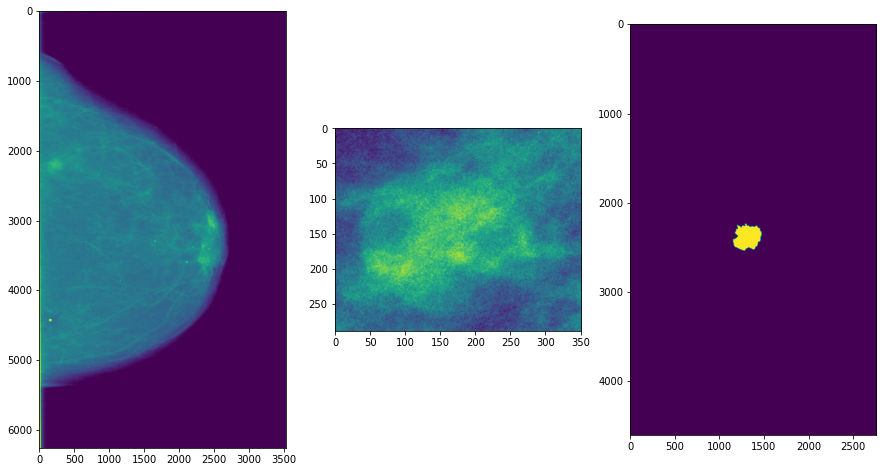

In [132]:
img_ROI = cv.imread(ROI_training_images_path.values[0], cv.IMREAD_GRAYSCALE)
img_Cropped = cv.imread(cropped_training_images_path.values[0], cv.IMREAD_GRAYSCALE)
img_Full = cv.imread(full_training_images_path.values[0], cv.IMREAD_GRAYSCALE)
def show_images(img1, img2, img3):
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    ax[2].imshow(img3)
    plt.show()
show_images(img_Full, img_Cropped, img_ROI)